Following code is partly adapted from [Lukas Snoek](https://lukas-snoek.com/NI-edu/fMRI-introduction/week_1/python_for_mri.html).

In [4]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import nibabel as nib
import pandas as pd
from config_local import helpers

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

hp = helpers()

In [5]:
_data_path = hp.get_data_path()
file = _data_path + "0010001/wmean_mrda0010001_session_1_rest_1.nii.gz"

In [6]:
subjs = [subj for subj in os.listdir(_data_path) if re.match("[0-9]{7}", subj)]
phenotypic = pd.read_csv(_data_path + "NYU_phenotypic.csv").rename({"ScanDir\ ID":"id"})

dic = {}


for i, subj in enumerate(subjs):
    
    file = _data_path + f"{subj}/wmean_mrda{subj}_session_1_rest_1.nii.gz"
    if os.path.exists(file):
        img = nib.load(file)
        data = img.get_fdata()
        y = phenotypic.loc[phenotypic['ScanDir ID']==int(subj), 'DX'].item()
        dic[subj] = {"img":img, "data":data, "dx":y}
    
    else:
        print(i, subj)
        dic[subj] = None
    

# read in tweets and replies
# the objects tweets/replies are lists of pd.DataFrames with replies[i] being the first hundred replies of tweet[i]
# tweets = [pd.read_csv(_path) for _path in _tweet_paths]



16 0010016
26 0010027
54 0010055


# Example nibabel

In [3]:
img = nib.load(file)

In [5]:
hdr = img.header
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 49 58 47  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  4.  4.  4.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL4.0'
aux_file        : b''
qform_code      : talairach
sform_code      : talairach
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 96.0
qoffset_y       : -132.0
qoffset_z       : -70.0
srow_x          : [-4. -0. -0. 96.]
s

In [14]:
hdr.get_data_shape()

(49, 58, 47)

In [15]:
img_data = img.get_fdata()
print(img_data.shape)

(49, 58, 47)


In [16]:
img_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

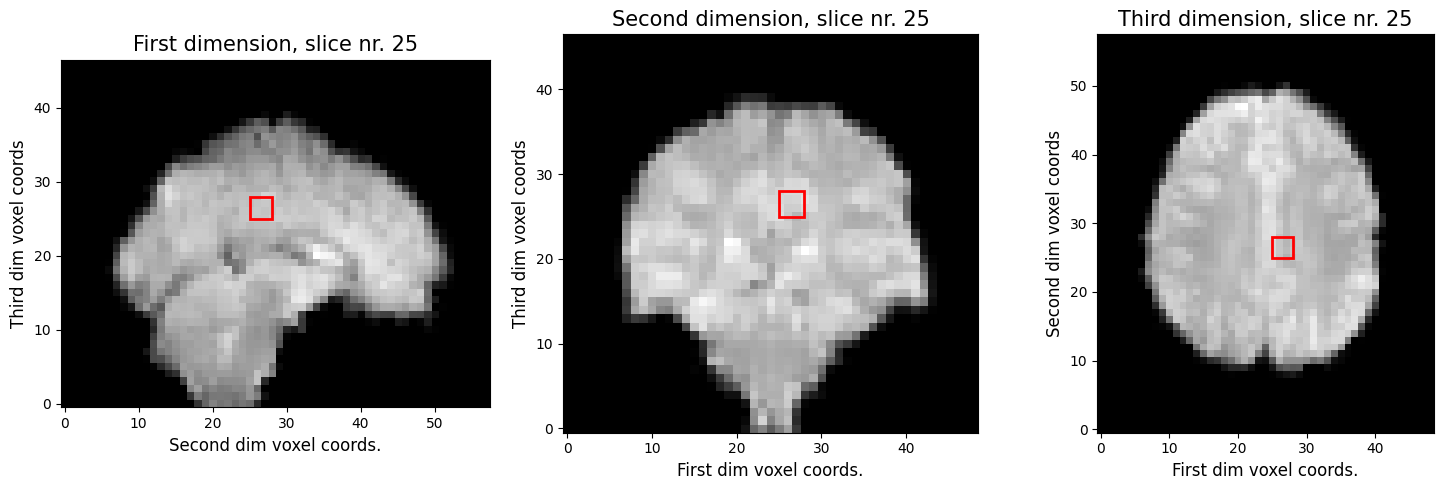

In [17]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

slices = [25, 25, 25]

ax[0].imshow(img_data[slices[0], :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title(f'First dimension, slice nr. {slices[0]}', fontsize=15)
rect = patches.Rectangle((25, 25), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)

ax[1].imshow(img_data[:, slices[1], :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title(f'Second dimension, slice nr. {slices[1]}', fontsize=15)
rect = patches.Rectangle((25, 25), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[1].add_patch(rect)

ax[2].imshow(img_data[:, :, slices[2]].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title(f'Third dimension, slice nr. {slices[2]}', fontsize=15)
rect = patches.Rectangle((25, 25), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[2].add_patch(rect)


fig.tight_layout()

# Fit naive lasso

## Preprocessing

In [7]:
# Create X and y array
for i, (id, subj) in enumerate(dic.items()):
    if subj is not None:
        if not i:
            X = subj['data'].reshape(1, 49, 58, 47)
            y = subj['dx']
        else:
            X = np.vstack((X, subj['data'].reshape(1, 49, 58, 47)))
            y = np.append(y, subj['dx'])

# flatten X array to fit model requirements
n_samples = X.shape[0]
X_flat = X.reshape((n_samples, -1))

In [8]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, shuffle=True
)

## Fit model

In [9]:
clf = Lasso(alpha=0.1)
clf.fit(X_train, y_train)

/home/jan/ds/3rd-semester/Stat/project/stat-venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.993e-03, tolerance: 5.191e-03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [12]:
acc_train = np.mean(np.round(clf.predict(X_train))==y_train)
acc_test = np.mean(np.round(clf.predict(X_test))==y_test)

print(f"Train accuracy:\t{np.round(acc_train, 2)}")
print(f"Test accuracy \t{np.round(acc_test, 2)}")


Train accuracy:	1.0
Test accuracy 	0.33


<p style="text-align: center;"><i><b>Fin</b></i></p>